**Load the required libraries and datasets**

In [1]:
# Libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
# Data
## Successfull appointment data 
seen_df = pd.read_csv("../data/exports/successfull-appointments.csv")

## Post intake data 
df = pd.read_csv("../data/exports/post-intake.csv")
df.head()

Chartnumber First post-enrollment service First post-intake service  \
0            1                        Intake                       TMS   
1            2                   MH Infusion                       NaN   
2            9                        Intake                       TMS   
3            6                        Intake               MH Infusion   
4           12                        Intake                       NaN   

   Post-intake days  Days btn MHinfusion and Intake  Visits  MH infusions  \
0              14.0                             NaN      49             0   
1               NaN                             NaN       8             8   
2               9.0                            66.0      68            30   
3               0.0                             0.0      16            13   
4               NaN                             NaN       1             0   

   infusions outside Cambridge  Visits outside Cambridge Intake Facility City  \
0                            0                         0            CAMBRIDGE   
1                            0                         0            CAMBRIDGE   
2                            0                         0            CAMBRIDGE   
3                            0                         0            CAMBRIDGE   
4                            0                         0            CAMBRIDGE   

  Patient category  
0  before mid-2023  
1  before mid-2023  
2  before mid-2023  
3  before mid-2023  
4  before mid-2023

In [3]:
# Convert appointment date to datetime 
seen_df["Date"] = pd.to_datetime(seen_df["Date"])

# Order the dataset by date 
seen_df = seen_df.sort_values(by="Date", ascending=True)
seen_df.reset_index(drop=True, inplace=True)

# Data analysis 

In [4]:
def remove_outliers(df, variable):
    """
    Docstring
    This function will remove the outliers from the variable in the data set
    - Uses the IQR method 
    """
    # Calculate Q1, Q3, and IQR
    Q1 = df[variable].quantile(0.25)  # 25th percentile
    Q3 = df[variable].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data to remove outliers
    df_no_outliers = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]

    return df_no_outliers

## Step 1: Formulate and Test Hypotheses
Here are some potential areas to investigate:

**Post-Intake Service Delays:**

- *Hypothesis:* Longer delays in receiving the first post-intake service could lead to fewer MH infusions.
- *Visualization Idea:* Boxplot or histogram showing Post-intake days by Intake Facility City and Patient Category.

**Service Accessibility:**

- *Hypothesis:* Patients requiring MH infusions outside Cambridge may have been impacted by logistical challenges or resource limitations.
- *Visualization Idea:* Bar chart comparing the count of Infusions outside Cambridge and Visits outside Cambridge across patient categories. - <span style="color: red;">**Not viable**</span>. Maybe over time trend analysis 

**Visit Patterns:**

- *Hypothesis:* A decline in Number of Visits correlates with fewer MH infusions.
- *Visualization Idea:* Scatterplot with Number of Visits on the x-axis and Number of MH infusions on the y-axis, color-coded by Intake Facility City.

**Intake-to-Infusion Time:**

- *Hypothesis:* Longer gaps between intake and the first MH infusion discourage subsequent infusions.
- *Visualization Idea:* Line plot showing the average Days btn MHinfusion and Intake over time (by patient category).

<Axes: xlabel='Patient category', ylabel='Post-intake days'>

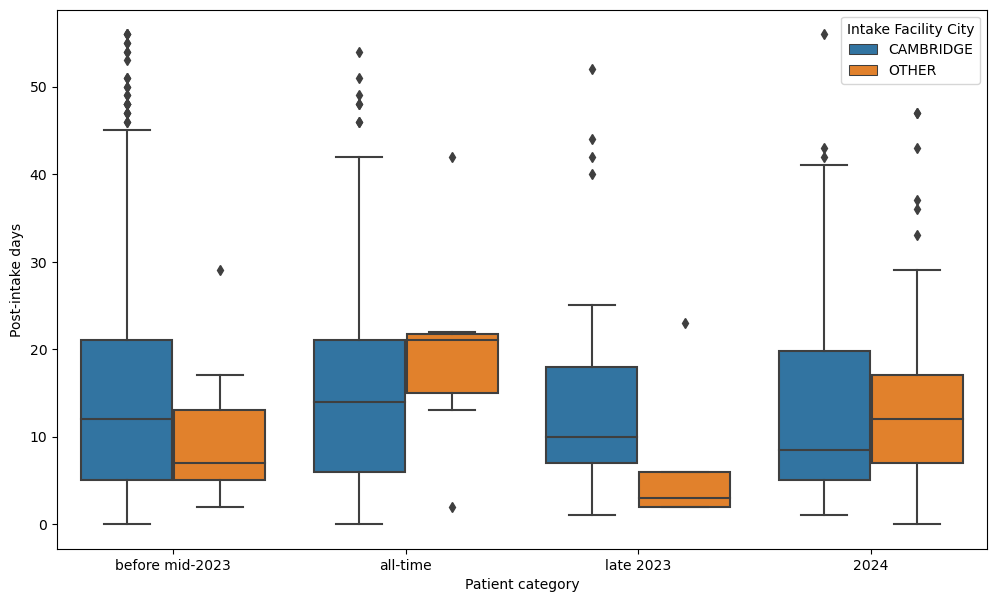

In [5]:
# Post-intake Service Delays
## Select the required columns 
selected_columns = ["Patient category", "Post-intake days", "Intake Facility City"]
select_df = df[selected_columns]

## Remove outliers
select_df = remove_outliers(select_df, "Post-intake days")

## Plotting 
plt.figure(figsize=(12, 7))
sns.boxplot(x="Patient category", y="Post-intake days", 
            hue="Intake Facility City", data=select_df)

<Axes: xlabel='Patient category', ylabel='Post-intake days'>

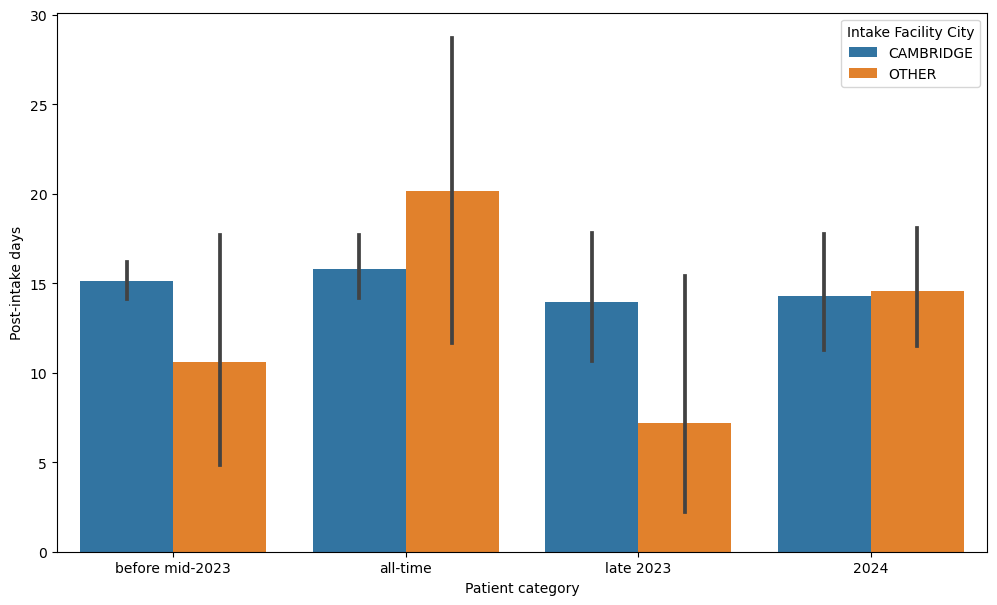

In [6]:
# Now with a bar plot 
plt.figure(figsize=(12, 7))
sns.barplot(x="Patient category", y="Post-intake days", 
            hue="Intake Facility City", data=select_df)

We understand from the first time series analysis, MH infusions started dropping in mid 2023 the situation worsened in 2024. Therefore the findings, insights and recommendations are based on this content

**Results**

- Patients in the late 2023 category had the least post-intake service delays. This might have been attributed due to the short timeframe - patients who existed there for only six months. 
- The 2024 category had a higher delay periods than the before mid-2023 patients(Outside Cambridge). Keep in mind the former category has barely received the services for a year while the later category received services for more than 5 years.
- All time patients in all facilities had delayed most before receiving their first service after intake. 


<span style="color: orange;">**Insight**</span>: Patients need to be given more time after intake before receiving their first service. This may be as a result of 

* insufficient funds that make the patients shy away from the services. This might be improved by discussion from within. Like how you can improve 
* Patients who receive their first service quickly might not have enough time to build trust with the hospital or fully understand the value of MH infusions.
* Those who take longer before the first service may have a stronger commitment to the treatment plan, possibly due to pre-existing relationships or extended education on the importance of the therapy. 
* Patients who take longer to get their first service may have more severe or complex conditions, requiring ongoing attention and more MH infusions.
* Patients with delayed first services might have proactively worked around scheduling constraints, showing a higher level of personal initiative to stay engaged.
* Patients receiving prompt first services may not experience sufficient follow-up or reminders to continue care.(**This is an idea that I will investigate later**- number of follow-ups over time)

<span style="color: orange;">**Recomendations**</span> 



<Axes: xlabel='Patient category', ylabel='Days btn MHinfusion and Intake'>

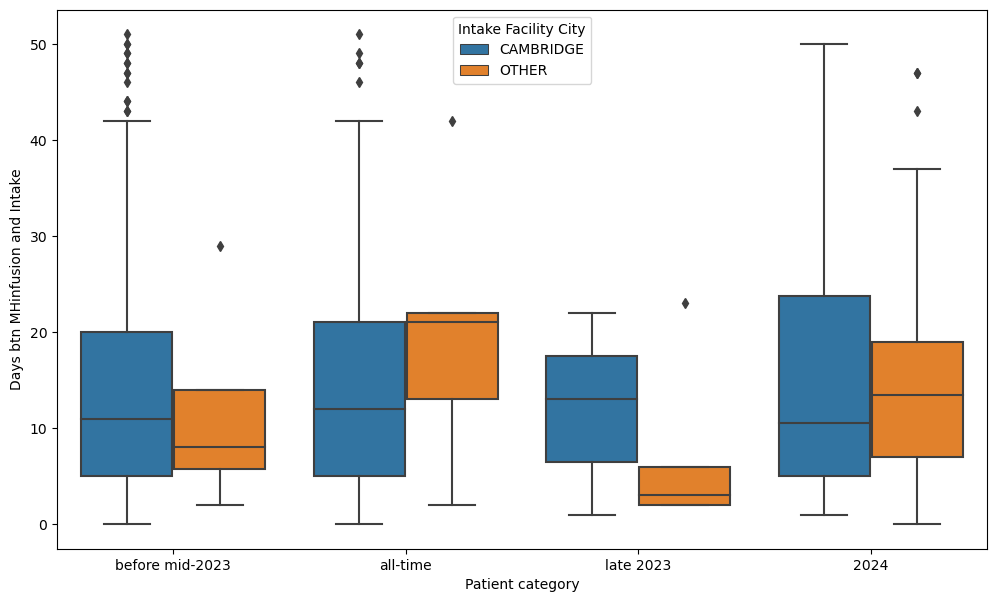

In [7]:
# Post-intake Service Delays
## Select the required columns 
selected_columns = ["Patient category", "Days btn MHinfusion and Intake", "Intake Facility City"]
select_df = df[selected_columns]

## Remove outliers
select_df = remove_outliers(select_df, "Days btn MHinfusion and Intake")

## Plotting 
plt.figure(figsize=(12, 7))
sns.boxplot(x="Patient category", y="Days btn MHinfusion and Intake", 
            hue="Intake Facility City", data=select_df)

<Axes: xlabel='Patient category', ylabel='Days btn MHinfusion and Intake'>

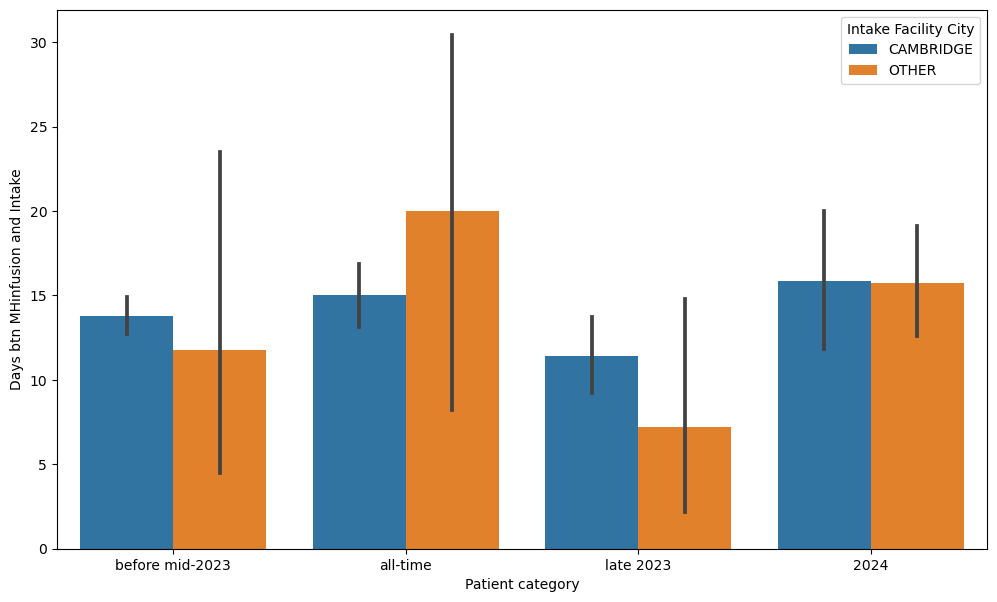

In [8]:
plt.figure(figsize=(12, 7))
sns.barplot(x="Patient category", y="Days btn MHinfusion and Intake", 
            hue="Intake Facility City", data=select_df,
           estimator="mean")

- Patients that had intake from Cambridge had to wait relatively longer to get their first service after intake compared to facilities in other cities
- Patients who joined in 2024 waited longer to have their first MH infusion than all time patients and the ones before mid 2023. 
- Patients in late 2023 waited the least. It is practically imposible for them to have longer waiting period since they are the segments that had their first and last service in a span of 6 months (From beginning of July to the end-year). 

## <span style="color: orange;">**Bonus Idea**</span>

What if I check the span(days) between successive appointments over time? 

*Hypothesis*: Patients are made to wait more in Cambridge for their next appointment. That is the cause of the drop of MH infusions. 

I wanna analyze get the date of the most recent visit and MH infusion over time. Line chart for Cambridge and facilities in other cities to see how it compares with other cities its changes over time

In [9]:
# Will be required to have the appointment data 

**Blueprint**

Columns required; 

- date of service, 
- facility city 
- Appointment Type group
- Chart number

All appointments must be successfull("Seen") 

How I will get this done; 

* Get the successfull appointment data 
* Loop through every record
* If record is intake just "pass" record zero otherwise use the chart number to backcheck its recent appointment
    - Backchecking will be done by slicing the data set till the current index(one row behind)
    - Filter to get the very chart number
    - Check the date of the last service 
    - Calculate the difference in days 
    
* Add the day difference to a list


**Repeat the same for MH infusion**

Columns to added - "days since last visit" and "days since last MH infusion" 

In [10]:
# Days since last visit
days_since_last_visit = []
delay_for_MHinfusion = []

for index_number in seen_df.index:
    # Note the chart number and the current date
    current_date = seen_df.iloc[index_number]["Date"]
    chart_number = seen_df.iloc[index_number]["Chartnumber"]
    service_type = seen_df.iloc[index_number]["Appt Type Group"] 

    if index_number == 0: # No past records 
        days_since_last_visit.append(np.nan) # add a null point 
        delay_for_MHinfusion.append(np.nan)

    else: # Posibility of past records for the patient 
        # select all the records before it
        records_before = seen_df.iloc[0:index_number] # add null point 
        
        # Select the records before specifically for the patient 
        patients_records_before = records_before[records_before["Chartnumber"]==chart_number]\
        .reset_index(drop=True)
        
        # if no records at all 
        if patients_records_before.shape[0]==0:
            days_since_last_visit.append(np.nan)
            delay_for_MHinfusion.append(np.nan)

        else: # past records exists
            
            # Select the last_record
            last_record = patients_records_before.to_records()[-1]
            # Note the last date 
            last_date = pd.Timestamp(last_record[1])

            delay_days = (current_date - last_date).days
            days_since_last_visit.append(delay_days) # Add the delay days
            
            # Check for MH infusion delays 
            if service_type == 'MH Infusion':
                delay_for_MHinfusion.append(delay_days)
            else:
                delay_for_MHinfusion.append(np.nan)
            
            

In [11]:
# add to the dataframe
seen_df["Days since last visit"] = days_since_last_visit
seen_df["Delay for MH infusion"] = delay_for_MHinfusion

In [12]:
# Data Preparation 
## Specicifically for MH infusion
MHinfusion_delays_df = seen_df[["Date", "Delay for MH infusion"]].groupby("Date").mean()
MHinfusion_delays_df.dropna(how="any", inplace=True) # Drop null records

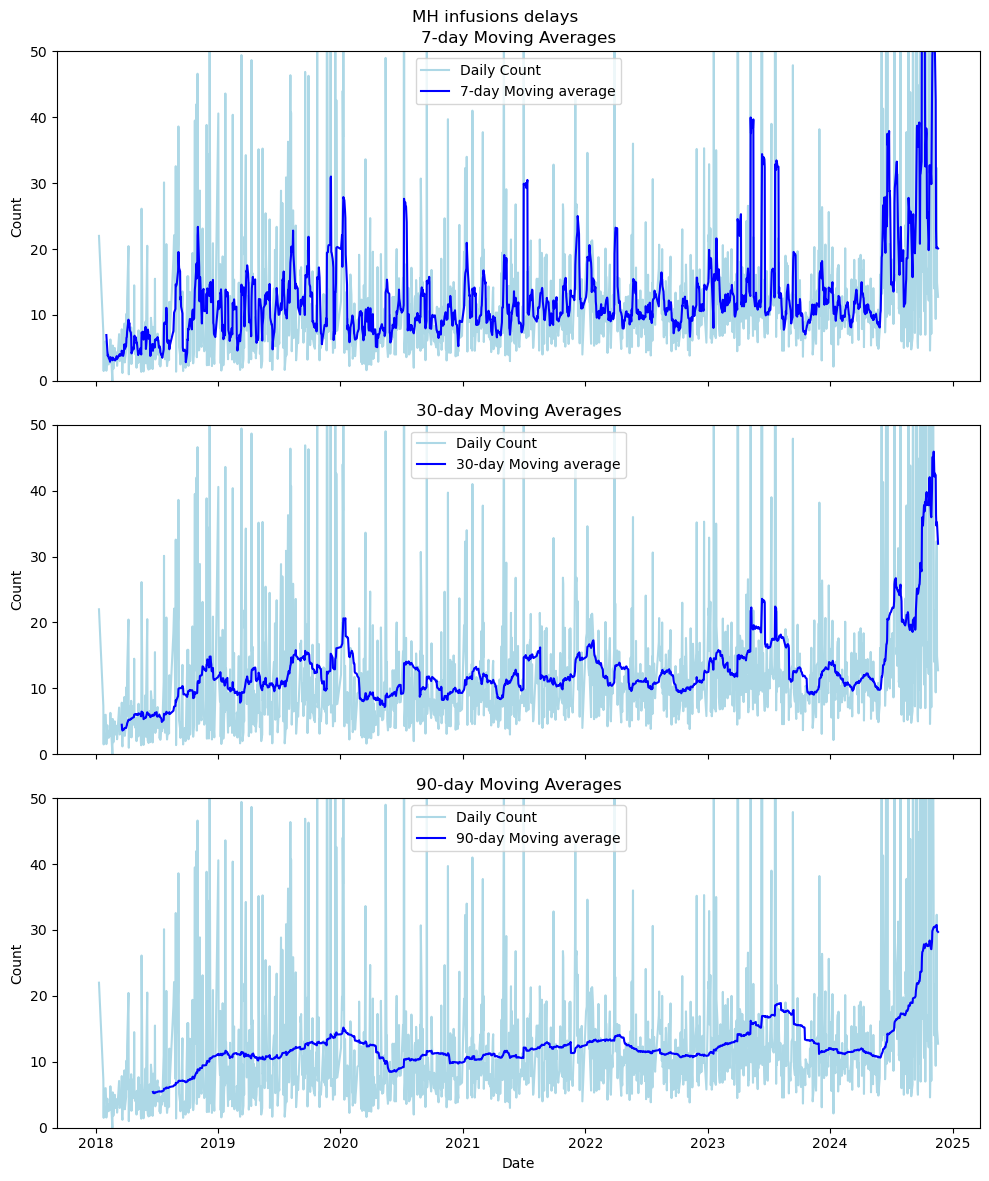

In [13]:
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
MHinfusion_delays_df["7_day_MA"] = MHinfusion_delays_df["Delay for MH infusion"].rolling(window=7).mean()
## Plotting
axes[0].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[0].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Count")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
MHinfusion_delays_df["30_day_MA"] = MHinfusion_delays_df["Delay for MH infusion"].rolling(window=30).mean()
## Plotting
axes[1].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[1].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Count")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
MHinfusion_delays_df["90_day_MA"] = MHinfusion_delays_df["Delay for MH infusion"].rolling(window=90).mean()
## Plotting
axes[2].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[2].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["90_day_MA"],
        label = "90-day Moving average", color="blue")
axes[2].set_ylabel("Count")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
axes[2].set_ylim(0, 50)

plt.suptitle("MH infusions delays")

plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [14]:
# Prepare data 
## Days since last visit exclusive data 
last_visit_df = seen_df[["Date", "Days since last visit"]].groupby("Date").mean()
last_visit_df.dropna(how="any", inplace=True) # Drop null records

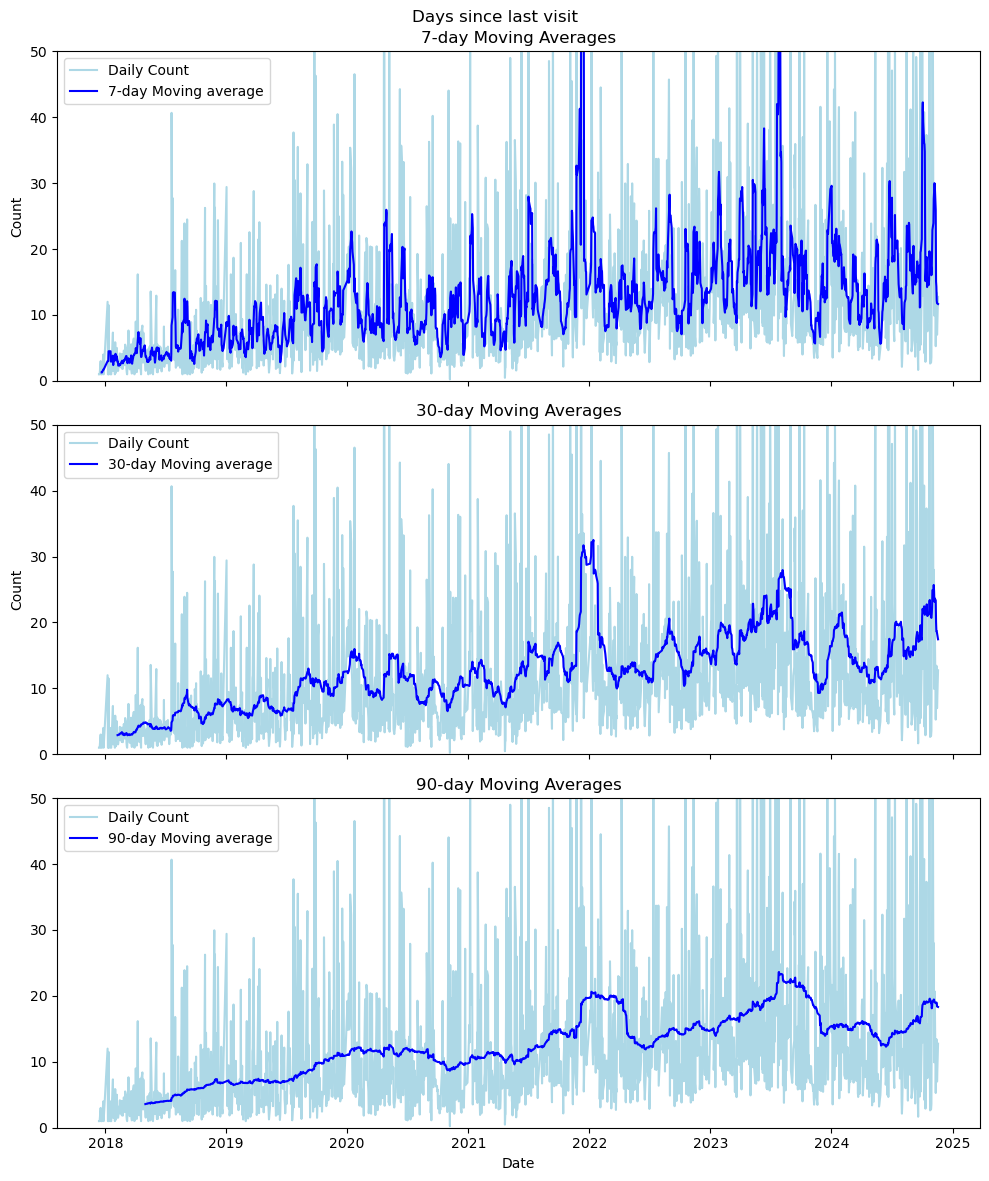

In [15]:
# Plot a line for days since last visit
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
last_visit_df["7_day_MA"] = last_visit_df["Days since last visit"].rolling(window=7).mean()
## Plotting
axes[0].plot(last_visit_df.index, last_visit_df["Days since last visit"],
        label = "Daily Count", color="lightblue")
axes[0].plot(last_visit_df.index, last_visit_df["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Count")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
last_visit_df["30_day_MA"] = last_visit_df["Days since last visit"].rolling(window=30).mean()
## Plotting
axes[1].plot(last_visit_df.index, last_visit_df["Days since last visit"],
        label = "Daily Count", color="lightblue")
axes[1].plot(last_visit_df.index, last_visit_df["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Count")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
last_visit_df["90_day_MA"] = last_visit_df["Days since last visit"].rolling(window=90).mean()
## Plotting
axes[2].plot(last_visit_df.index, last_visit_df["Days since last visit"],
        label = "Daily Count", color="lightblue")
axes[2].plot(last_visit_df.index, last_visit_df["90_day_MA"],
        label = "90-day Moving average", color="blue")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
axes[2].set_ylim(0, 50)

plt.suptitle("Days since last visit")

plt.xlabel("Date")
plt.tight_layout()
plt.show()

## Step 2: Compare Cambridge vs. Other Cities

Check how average delays of Cambridge compares with other cities in terms of MH infusion

In [16]:
# Prepare the data
## Cambridge facilities 
cambridge_mhinfusion_delays = seen_df[seen_df["Facility City"]=="CAMBRIDGE"][["Date", "Delay for MH infusion"]]
cambridge_mhinfusion_delays = cambridge_mhinfusion_delays.groupby("Date").mean()

### Clean the data
cambridge_mhinfusion_delays.dropna(how="any", inplace=True)

## Other city facilities 
other_mhinfusion_delays = seen_df[seen_df["Facility City"]!="CAMBRIDGE"][["Date", "Delay for MH infusion"]]
other_mhinfusion_delays = other_mhinfusion_delays.groupby("Date").mean()

### Clean the data 
other_mhinfusion_delays.dropna(how="any", inplace=True)

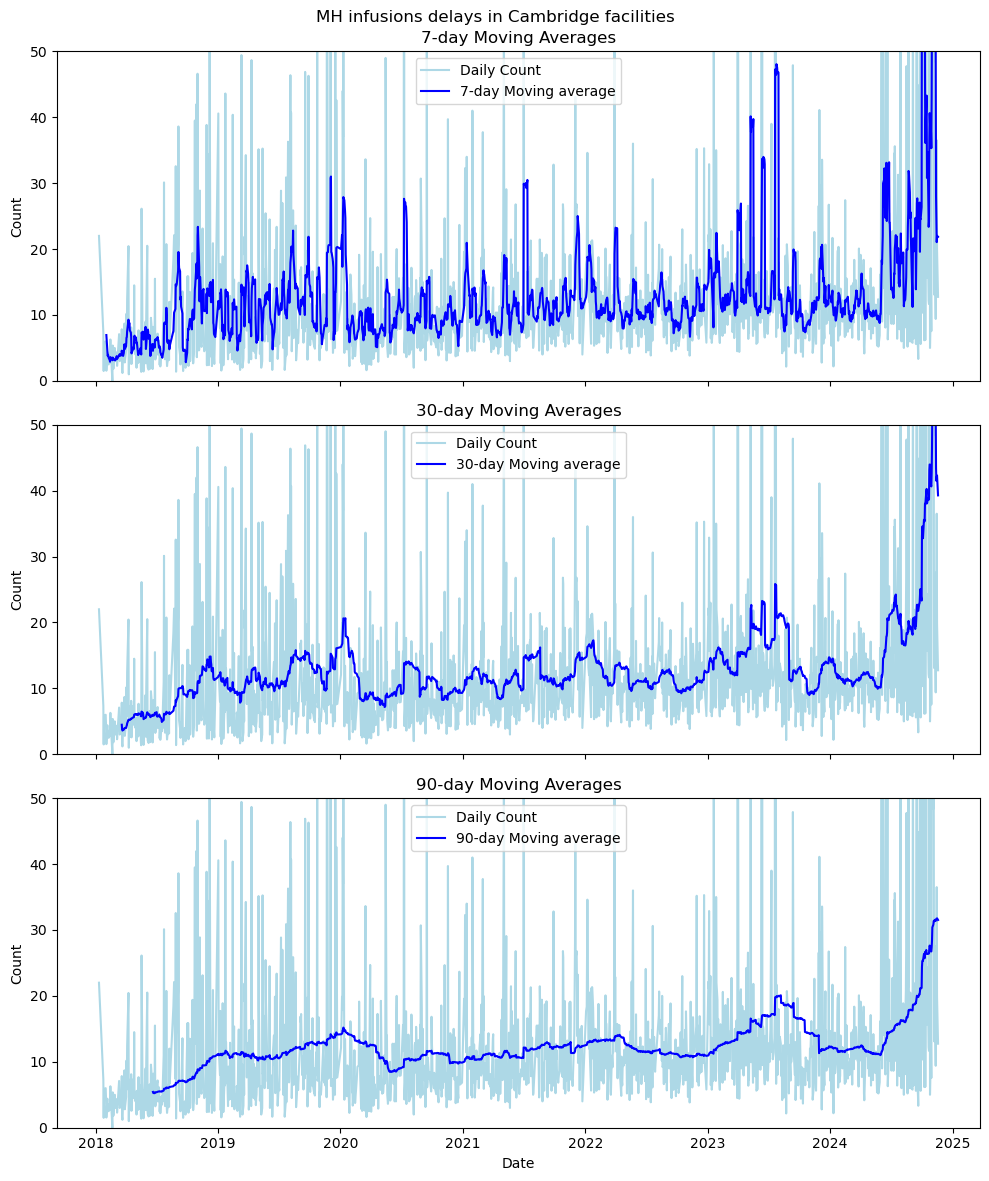

In [17]:
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
cambridge_mhinfusion_delays["7_day_MA"] = cambridge_mhinfusion_delays["Delay for MH infusion"].rolling(window=7).mean()
## Plotting
axes[0].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[0].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Count")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
cambridge_mhinfusion_delays["30_day_MA"] = cambridge_mhinfusion_delays["Delay for MH infusion"].rolling(window=30).mean()
## Plotting
axes[1].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[1].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Count")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
cambridge_mhinfusion_delays["90_day_MA"] = cambridge_mhinfusion_delays["Delay for MH infusion"].rolling(window=90).mean()
## Plotting
axes[2].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[2].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["90_day_MA"],
        label = "90-day Moving average", color="blue")
axes[2].set_ylabel("Count")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
axes[2].set_ylim(0, 50)

plt.suptitle("MH infusions delays in Cambridge facilities")

plt.xlabel("Date")
plt.tight_layout()
plt.show()

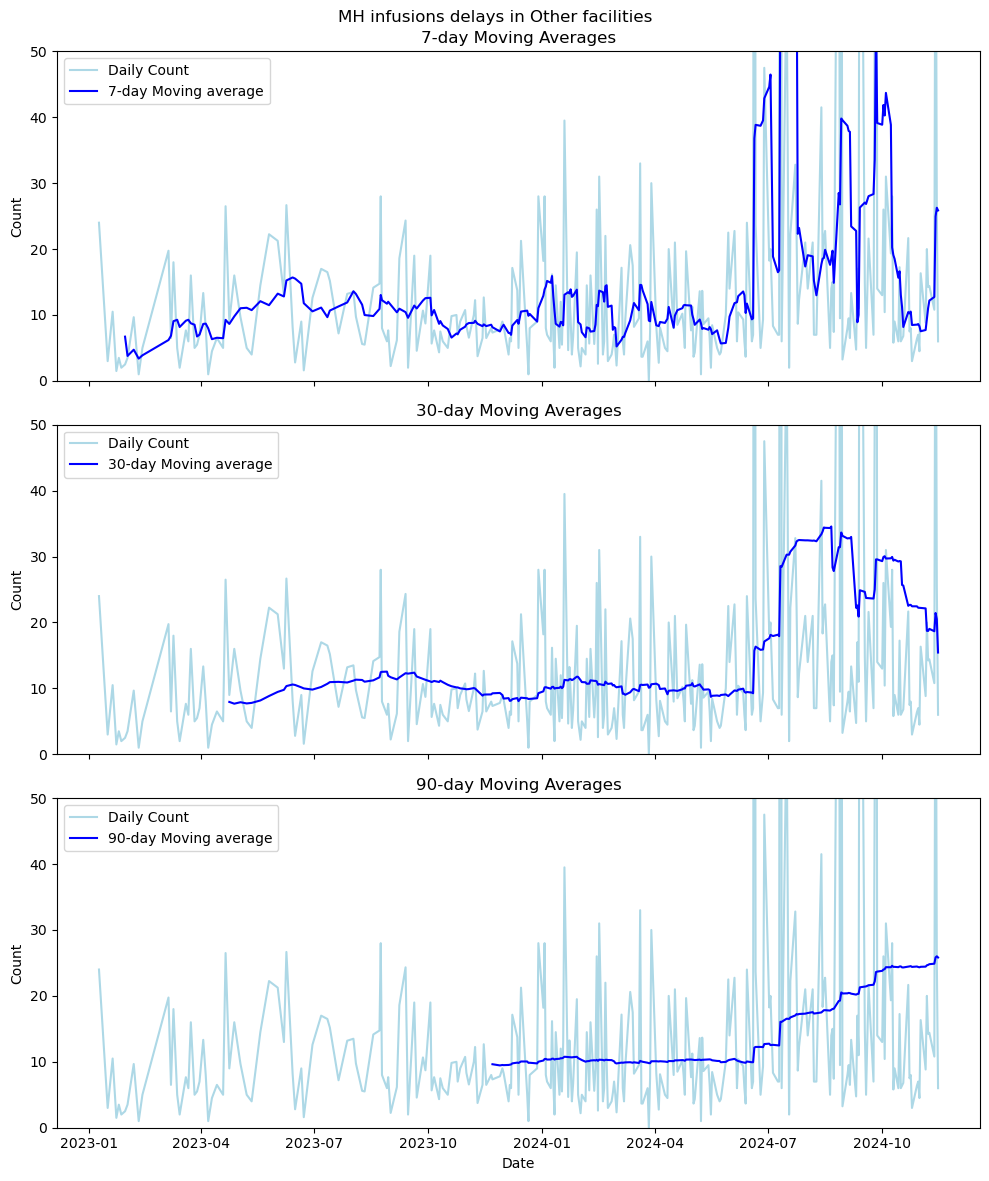

In [18]:
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
other_mhinfusion_delays["7_day_MA"] = other_mhinfusion_delays["Delay for MH infusion"].rolling(window=7).mean()
## Plotting
axes[0].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[0].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Count")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
other_mhinfusion_delays["30_day_MA"] = other_mhinfusion_delays["Delay for MH infusion"].rolling(window=30).mean()
## Plotting
axes[1].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[1].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Count")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
other_mhinfusion_delays["90_day_MA"] = other_mhinfusion_delays["Delay for MH infusion"].rolling(window=90).mean()
## Plotting
axes[2].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[2].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["90_day_MA"],
        label = "90-day Moving average", color="blue")
axes[2].set_ylabel("Count")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
axes[2].set_ylim(0, 50)

plt.suptitle("MH infusions delays in Other facilities")

plt.xlabel("Date")
plt.tight_layout()
plt.show()

## Step 3: Drill Down into Specific Factors

**Investigate outliers or anomalies in the dataset.**

- For example, were there patients with exceptionally high delays or very few visits? What patterns emerge?

**Conduct subgroup analysis:**

- Compare patients with and without Infusions outside Cambridge.
- Analyze patients who received MH infusions in 2024 to identify distinguishing factors.

## Step 4: Synthesize Findings*

- Summarize your results with tables and visualizations.
- Provide actionable insights based on the findings (e.g., "Resource constraints in Cambridge caused delays in post-intake services leading to fewer MH infusions.").

# Remember to analyze the patients who had intake in Cambridge how they switched their services to other facilities 

- Count the number of service in other facilities
- This might be due to travels, cost, crowding of patients 


In [ ]:
# line chart of infusions outside and visits outside cambridge

In [ ]:
## Intake Facility City - Cambridge

In [ ]:
# ### Prepare the data
# d1 = seen_df[seen_df["Appt Type Group"]=="MH Infusion"]
# d2 = d1[d1["Facility City"]=="CAMBRIDGE"]
# d2[["Appt Type Group", "Date"]].groupby("Date").count().plot(figsize=(12, 7))

In [ ]:
d1 = seen_df[seen_df["Facility City"]=="CAMBRIDGE"]
d1[["Appt Type Group", "Date"]].groupby("Date").count().plot(figsize=(12, 7))

In [ ]:
## Intake Facility City - Not Cambridge

In [ ]:
df[df["Intake Facility City"]=="CAMBRIDGE"]["infusions outside Cambridge"].sum()

In [ ]:
df[df["Intake Facility City"]=="CAMBRIDGE"]["Visits outside Cambridge"].sum()

In [ ]:
df[df["Intake Facility City"]!="CAMBRIDGE"]["infusions outside Cambridge"].sum()

In [ ]:
df[df["Intake Facility City"]!="CAMBRIDGE"]["Visits outside Cambridge"].sum()

In [ ]:
df[df["Intake Facility City"]!="CAMBRIDGE"]["Visits"].mean()

In [ ]:
df[df["Intake Facility City"]!="CAMBRIDGE"]["MH infusions"].mean()

In [ ]:
# Lets check how it grows over time

In [ ]:
df

### Recommended Visualizations and Tables:

- **Boxplots:** Compare delays and infusions across categories.
- **Bar Charts:** Compare counts (e.g., visits, infusions) between Cambridge and other cities.
- **Scatterplots:** Correlations between visits and infusions.
- **Pivot Tables:** Summary of metrics segmented by facility and category.
- **Heatmaps:** Highlight correlations between variables.

Count the intakes, and compare them yearly - new data set